In [ ]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics


from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [ ]:
dataset =  pd.read_csv("/content/drive/MyDrive/Customer_Churn/Cleaned_data_24_10_22.csv")
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = dataset[['Geography', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited']].copy()
df.head(5)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,42,2,0.00,1,1,1,1
1,2,0,41,1,83807.86,1,0,1,0
2,0,0,42,8,159660.80,3,1,0,1
3,0,0,39,1,0.00,2,0,0,0
4,2,0,43,2,125510.82,1,1,1,0


In [ ]:
df.shape

(15682, 9)

In [ ]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [ ]:

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# DEFINE MODEL AND PERFORMANCE MEASURE
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}

# **Repeatable 50:50**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.50, random_state=1)

In [ ]:
svm_model1 = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 10, random_state = 2017, scoring = auc) 
svm_model1.fit(X_train1, y_train1) 
svm_model1.cv_results_

{'mean_fit_time': array([67.06692963, 37.8998873 , 66.23166568, 39.01808515, 40.64940591,
        63.11439214, 44.15452471, 44.04527733, 41.9710772 , 63.88019993,
        42.54885206, 45.25406821, 68.69208784, 33.51527281, 65.27090981,
        31.87158599, 63.34321051, 65.75520434, 34.45092645, 42.69715424]),
 'std_fit_time': array([2.23159661, 0.47420444, 2.44290263, 0.37797592, 0.63085646,
        1.76525256, 0.73753696, 0.49193284, 0.48043041, 1.18334113,
        1.05150777, 0.85259264, 1.17760843, 0.44104408, 1.54641594,
        0.36811298, 1.99740145, 1.42571209, 0.47978256, 8.82625678]),
 'mean_score_time': array([0.9477416 , 0.59396393, 0.88388953, 0.66616421, 0.65259361,
        0.89290459, 0.70538037, 0.6645597 , 0.60021534, 0.93340931,
        0.73948784, 0.71552958, 0.95657072, 0.54155478, 0.87810166,
        0.60407948, 0.75394397, 0.98095372, 0.56022489, 0.60254169]),
 'std_score_time': array([0.0440318 , 0.03112124, 0.04790767, 0.01984782, 0.04153417,
        0.057698  , 

In [ ]:

# Predict values using the training data
svm_cv_predict_train1 = svm_model1.predict(X_train1)

# View the accuracy of the model against the training data.  Y_train are the known class values,
# and lr_cv_predict_train are the predicted class values for the same features.
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train1, svm_cv_predict_train1)))
print()

Accuracy against training data: 0.8721



In [ ]:
# Predict values using the test data
svm_cv_predict_test1 = svm_model1.predict(X_test1)

# View the accuracy of the model against the test data.  Y_test are the known class values,
# and lr_cv_predict_test are the predicted class values for the same features.
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test1, svm_cv_predict_test1)))
print()

Accuracy against test data: 0.8351



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test1, svm_cv_predict_test1))
print()

Confusion Matrix
[[3224  676]
 [ 617 3324]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test1, svm_cv_predict_test1))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3900
           1       0.83      0.84      0.84      3941

    accuracy                           0.84      7841
   macro avg       0.84      0.84      0.84      7841
weighted avg       0.84      0.84      0.84      7841




# **Repeatabale 80:20**

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
svm_model2 = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 10, random_state = 2017, scoring = auc) 
svm_model2.fit(X_train2, y_train2) 
svm_model2.cv_results_

{'mean_fit_time': array([220.05321274, 110.22931333, 215.62530282,  98.73580074,
        100.26049645, 190.98020289, 110.52998438, 127.90662708,
        135.67876849, 209.78667183, 109.03169653, 114.48728161,
        223.97451282,  93.10180182, 212.33962293,  92.80936399,
        143.04830589, 255.80640967,  98.14946048, 118.04562418]),
 'std_fit_time': array([11.94992883,  3.84192262,  6.32407294,  2.25115875,  1.32556915,
         3.65325719,  1.14726484, 12.48822863,  7.08635352,  3.73888532,
         0.86876373,  1.60647725,  3.26149159,  1.16840419,  2.93159487,
         2.88499125,  4.85049185,  4.19812409,  0.96028654, 13.79536509]),
 'mean_score_time': array([2.28003283, 1.48523588, 1.94827178, 1.55860782, 1.53996394,
        2.04397223, 1.59946914, 1.74790964, 1.57200177, 2.18085454,
        1.64562759, 1.61859524, 2.15077374, 1.30241594, 1.96331625,
        1.4466223 , 1.72425327, 2.27617707, 1.3448539 , 1.41507165]),
 'std_score_time': array([0.06768103, 0.0787349 , 0.119969

In [ ]:
# Predict values using the training data
svm_cv_predict_train2 = svm_model2.predict(X_train2)

# View the accuracy of the model against the training data.  Y_train are the known class values,
# and lr_cv_predict_train are the predicted class values for the same features.
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train2, svm_cv_predict_train2)))
print()

Accuracy against training data: 0.8762



In [ ]:
# Predict values using the test data
svm_cv_predict_test2 = svm_model2.predict(X_test2)

# View the accuracy of the model against the test data.  Y_test are the known class values,
# and lr_cv_predict_test are the predicted class values for the same features.
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test2, svm_cv_predict_test2)))
print()

Accuracy against test data: 0.8400



In [ ]:

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test2, svm_cv_predict_test2))
print()

Confusion Matrix
[[1303  258]
 [ 244 1332]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test2, svm_cv_predict_test2))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1561
           1       0.84      0.85      0.84      1576

    accuracy                           0.84      3137
   macro avg       0.84      0.84      0.84      3137
weighted avg       0.84      0.84      0.84      3137




# **Stratified 50:50**

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.50, random_state=1,stratify=y)

In [ ]:
svm_model3 = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 10, random_state = 2017, scoring = auc) 
svm_model3.fit(X_train3, y_train3) 
svm_model3.cv_results_

{'mean_fit_time': array([67.84626393, 41.36236336, 69.08763466, 41.13005948, 42.89562566,
        66.08308818, 45.91495972, 49.87674253, 47.3207649 , 67.68100483,
        44.42269468, 45.65275531, 68.96725464, 36.28754499, 67.39813342,
        34.55198059, 67.11005213, 69.56076643, 37.53027821, 46.74778697]),
 'std_fit_time': array([1.75461353, 0.67003315, 2.48356895, 0.45041019, 0.4370841 ,
        2.12706996, 0.85997012, 0.57950412, 0.87686213, 2.12237688,
        0.7637362 , 0.59697302, 2.31620993, 0.32359913, 1.7382318 ,
        0.33726888, 2.41661261, 1.89126686, 0.60449474, 7.21913126]),
 'mean_score_time': array([1.03185012, 0.63503709, 0.86879611, 0.68272028, 0.6745563 ,
        0.93091614, 0.74894121, 0.71886203, 0.61900012, 0.95122895,
        0.75846438, 0.71222041, 0.9579586 , 0.59524345, 0.89307723,
        0.61959329, 0.77333584, 1.0129348 , 0.60194273, 0.62129993]),
 'std_score_time': array([0.06450525, 0.04221105, 0.08705969, 0.03616176, 0.06972964,
        0.02944846, 

In [ ]:
# Predict values using the training data
svm_cv_predict_train3 = svm_model3.predict(X_train3)

# View the accuracy of the model against the training data.  Y_train are the known class values,
# and lr_cv_predict_train are the predicted class values for the same features.
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train3, svm_cv_predict_train3)))
print()

Accuracy against training data: 0.8666



In [ ]:
# Predict values using the test data
svm_cv_predict_test3 = svm_model3.predict(X_test3)

# View the accuracy of the model against the test data.  Y_test are the known class values,
# and lr_cv_predict_test are the predicted class values for the same features.
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test3, svm_cv_predict_test3)))
print()

Accuracy against test data: 0.8396



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test3, svm_cv_predict_test3))
print()

Confusion Matrix
[[3319  601]
 [ 657 3264]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test3, svm_cv_predict_test3))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3920
           1       0.84      0.83      0.84      3921

    accuracy                           0.84      7841
   macro avg       0.84      0.84      0.84      7841
weighted avg       0.84      0.84      0.84      7841




# **Stratified 80:20**

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [ ]:
svm_model4 = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 10, random_state = 2017, scoring = auc) 
svm_model4.fit(X_train4, y_train4) 
svm_model4.cv_results_

{'mean_fit_time': array([224.81609011, 102.967643  , 218.44413559, 104.00509696,
        108.96917803, 207.51530638, 119.18915446, 119.28774507,
        116.45166488, 217.61715648, 111.13999975, 113.43348081,
        219.28872671,  89.9781167 , 202.2072648 ,  84.63475637,
        132.17969067, 235.82660077,  90.3935328 , 110.92890141]),
 'std_fit_time': array([ 4.87142777,  1.49635488,  4.6490628 ,  1.03448129,  1.58663617,
         3.27665152,  2.85654595,  1.53201228,  1.27090786,  3.75567367,
         1.58701273,  1.11248253,  3.19495953,  0.78481228,  3.14745013,
         0.99097112,  3.95689752,  2.77899746,  1.03766017, 15.35775789]),
 'mean_score_time': array([2.28526068, 1.38240335, 1.94368718, 1.54785128, 1.59366035,
        2.09367905, 1.61337891, 1.56360891, 1.39014242, 2.18964443,
        1.68024273, 1.54210787, 2.1879391 , 1.32336669, 1.94260771,
        1.40098002, 1.66244626, 2.27811275, 1.35174868, 1.3728662 ]),
 'std_score_time': array([0.07688789, 0.10007028, 0.094086

In [ ]:
# Predict values using the training data
svm_cv_predict_train4 = svm_model4.predict(X_train4)

# View the accuracy of the model against the training data.  Y_train are the known class values,
# and lr_cv_predict_train are the predicted class values for the same features.
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train4, svm_cv_predict_train4)))
print()

Accuracy against training data: 0.9259



In [ ]:
# Predict values using the test data
svm_cv_predict_test4 = svm_model4.predict(X_test4)

# View the accuracy of the model against the test data.  Y_test are the known class values,
# and lr_cv_predict_test are the predicted class values for the same features.
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test4, svm_cv_predict_test4)))
print()

Accuracy against test data: 0.8435



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test4, svm_cv_predict_test4))
print()

Confusion Matrix
[[1315  253]
 [ 238 1331]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test4, svm_cv_predict_test4))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1568
           1       0.84      0.85      0.84      1569

    accuracy                           0.84      3137
   macro avg       0.84      0.84      0.84      3137
weighted avg       0.84      0.84      0.84      3137




# **AUC-ROC**

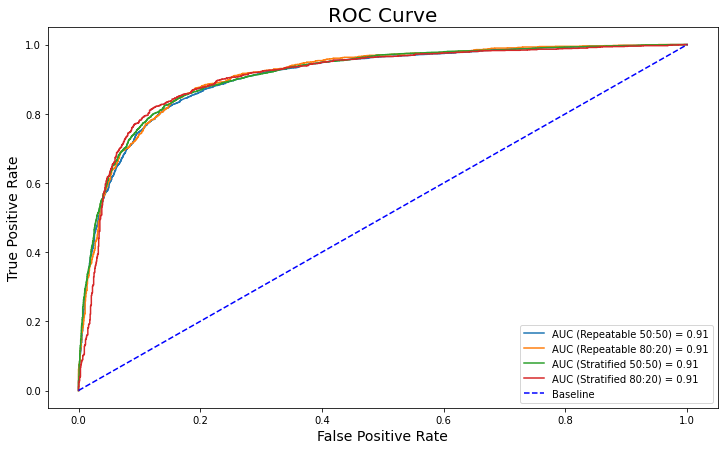

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_m1 = svm_model1.predict_proba(X_test1)[:, 1]
probs_m2 = svm_model2.predict_proba(X_test2)[:, 1]
probs_m3 = svm_model3.predict_proba(X_test3)[:, 1]
probs_m4 = svm_model4.predict_proba(X_test4)[:, 1]


# y_test_int = y_test.replace({'Exited': 1, 'Not Exited': 0})
auc_mod1 = roc_auc_score(y_test1, probs_m1)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, probs_m1)

auc_mod2 = roc_auc_score(y_test2, probs_m2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test2, probs_m2)

auc_mod3 = roc_auc_score(y_test3, probs_m3)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test3, probs_m3)

auc_mod4 = roc_auc_score(y_test4, probs_m4)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test4, probs_m4)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Repeatable 50:50) = {auc_mod1:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Repeatable 80:20) = {auc_mod2:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Stratified 50:50) = {auc_mod3:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (Stratified 80:20) = {auc_mod4:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();